# Importing required Libraries and reading CSV file into DataFrame


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [3]:
df=pd.read_csv('C:/Users/GSP-LAP-009/OneDrive/Desktop/Data Analyst Practice Projects/Heart Attack Prediction/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
duplicates=df.duplicated().any()
print(duplicates)

False


In [6]:
X=df.drop(columns='Heart Disease')
y=df['Heart Disease']
print("X matrix shape:",X.shape)
print("y vector shape:",y.shape)

X matrix shape: (270, 13)
y vector shape: (270,)


# Encoding dependent variable into binary

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded=le.fit_transform(y)


In [8]:
df['Heart Disease Encoded']=y_encoded

In [9]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Heart Disease Encoded
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,0


In [10]:
df2=df.drop(columns='Heart Disease')

In [11]:
df2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease Encoded
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


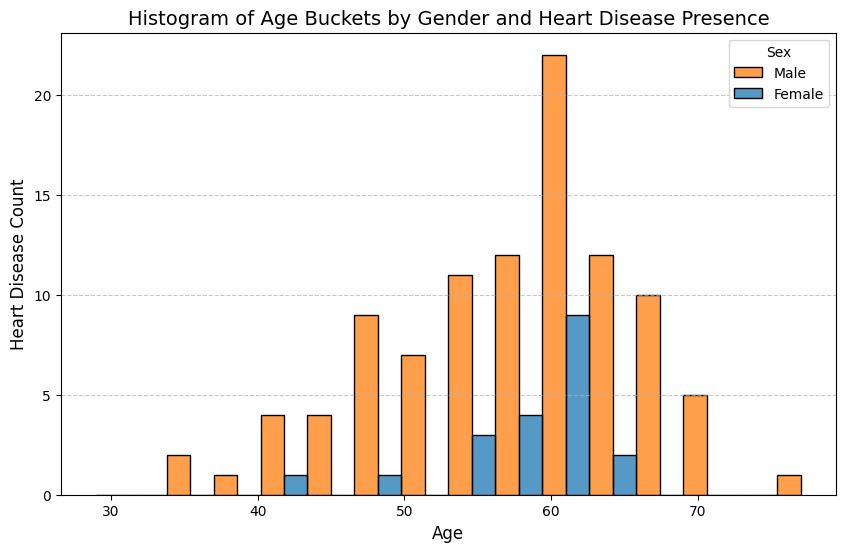

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df2,
    x='Age',
    hue='Sex',
    multiple='dodge',
    bins=15,
    kde=False,
    weights=df2['Heart Disease Encoded']
    
)

# Add labels and title
plt.title("Histogram of Age Buckets by Gender and Heart Disease Presence", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Heart Disease Count", fontsize=12)
plt.legend(title="Sex",labels=['Male', 'Female'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [13]:
df2.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease Encoded
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


In [14]:
df2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease Encoded
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


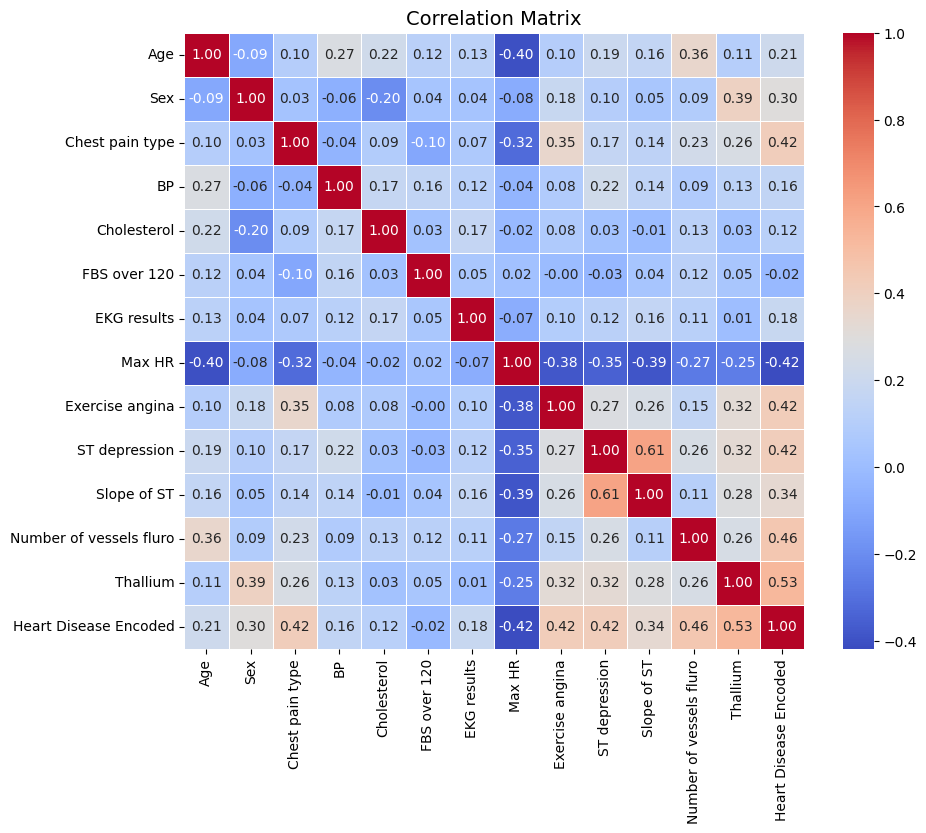

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

In [16]:
X2=df2.drop(columns='Heart Disease Encoded')
y2=df2['Heart Disease Encoded']
print('X2 matrix shape',X2.shape)
print('y2 matrix shape',y2.shape)


X2 matrix shape (270, 13)
y2 matrix shape (270,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X2, y2, test_size=0.33, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(180, 13)
(90, 13)
(180,)
(90,)


# Scaling independent variables

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
scaler.fit(X_train)

StandardScaler()

In [21]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print(X_train)

[[-0.31501848  0.67202151 -2.27355085 ...  0.65465367 -0.71184472
   0.63445147]
 [ 0.0121161   0.67202151  0.81893645 ...  0.65465367  0.32147826
   1.14887158]
 [ 0.33925067 -1.48804762 -0.21189265 ... -0.98198051 -0.71184472
  -0.90880886]
 ...
 [ 0.23020581 -1.48804762  0.81893645 ... -0.98198051 -0.71184472
  -0.90880886]
 [-0.42406334  0.67202151 -0.21189265 ...  0.65465367 -0.71184472
  -0.90880886]
 [-0.64215305 -1.48804762  0.81893645 ... -0.98198051 -0.71184472
  -0.90880886]]


# 1. Logistic Regression - 78.8%

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

#Evaluating model1
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression is:" + str(accuracy*100)+'%')

Accuracy of Logistic Regression is:78.88888888888889%


# 2. Random Forest Classifier - 81.1%

In [23]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)


y_pred_rf = model2.predict(X_test)

# Evaluating Model2
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier is:" + str(accuracy_rf*100)+'%')

Accuracy of Random Forest Classifier is:81.11111111111111%


# 3. Decision Tree Classifier - 73.3%

In [24]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train, y_train)
y_pred_dt = model3.predict(X_test)

# Evaluating Model3
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree Classifier is:" + str(accuracy_dt*100)+'%')

Accuracy of Decision Tree Classifier is:73.33333333333333%


# 4. Support Vector Classifier - 81.1%

In [25]:
from sklearn.svm import SVC
model4 = SVC(kernel='rbf', gamma='scale')  
model4.fit(X_train, y_train)


y_pred_svc = model4.predict(X_test)

#Evaluating model4
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy of Support Vector Classifier is:" + str(accuracy_svc*100)+'%')

Accuracy of Support Vector Classifier is:81.11111111111111%


# 5. K-Nearest Neighbors - 81.1%

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors=5)  
model5.fit(X_train, y_train)
y_pred_knn = model5.predict(X_test)

# Evaluating model5
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of K-Nearest Neighbor Classifier is:" + str(accuracy_knn*100)+'%')

Accuracy of K-Nearest Neighbor Classifier is:81.11111111111111%


# 6.Gaussian Naive Bayes -85.5%

In [27]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
model6.fit(X_train, y_train)

y_pred_nb = model6.predict(X_test)

# Evaluating model6
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Gaussian Naive Bayes is:" + str(accuracy_nb*100)+'%')

Accuracy of Gaussian Naive Bayes is:85.55555555555556%
